### Tweet text 가져오기

In [1]:
import twitter
import json

CONSUMER_KEY = "rsLCYlLmpL7vtKdvr5lzXLXPf"
CONSMER_SECRET = "EkBAgIihBomoCvt72ujzYAnCP7THjGdzqf8Lf8Oi7z62S5czZr"
OAUTH_TOKEN = "1094146369617457152-JfUk5BIYDKEvlpsziAgytN76sYTUzp"
OAUTH_TOKEN_SECRET = "6UwBm7Lp3CYkjMWiKuh6mwcv7oQHnL7V2EHUci7tr2Iy0"

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSMER_SECRET)
twitter_api = twitter.Twitter(auth = auth)
print(twitter_api)

In [103]:
q1 = '제트플립'
q2 = '아이폰SE'

count = 100
search_results1 = twitter_api.search.tweets(q = q1, count = count, 
                                            result_type = 'recent')
search_results2 = twitter_api.search.tweets(q = q2, count = count, result_type = 'recent')

statuses_flip = search_results1['statuses']
statuses_se = search_results2['statuses']


for _ in range(10):
    print("Length of statuses:", len(statuses_flip), len(statuses_se))
    
    
    try:
        next_results1 = search_results1['search_metadata']['next_results']
        next_results2 = search_results2['search_metadata']['next_results']
        
    except KeyError:
        print(search_results1['search_metadata'], search_results2['search_metadata'])
       
        break
        
    kwargs1 = dict([kv.split("=") for kv in next_results1[1:].split("&")])
    kwargs2 = dict([kv.split("=") for kv in next_results2[1:].split("&")])
    
    kwargs1['q'] = q1
    kwargs2['q'] = q2
    
    search_results1 = twitter_api.search.tweets(**kwargs1)
    search_results2 = twitter_api.search.tweets(**kwargs2)
    
    statuses_flip += search_results1['statuses']
    statuses_se += search_results2['statuses']

    
with open('statuses_flip.json', 'w', encoding = 'utf-8') as make_file: \
    json.dump(statuses_flip, make_file, ensure_ascii = False)

with open('statuses_se.json', 'w', encoding = 'utf-8') as make_file: \
    json.dump(statuses_se, make_file, ensure_ascii = False)

Length of statuses: 84
Length of statuses: 183
Length of statuses: 283
Length of statuses: 297
Length of statuses: 297
{'completed_in': 0.009, 'max_id': 1246063412561342463, 'max_id_str': '1246063412561342463', 'query': '%EC%A0%9C%ED%8A%B8%ED%94%8C%EB%A6%BD', 'refresh_url': '?since_id=1246063412561342463&q=%EC%A0%9C%ED%8A%B8%ED%94%8C%EB%A6%BD&result_type=recent&include_entities=1', 'count': 100, 'since_id': 0, 'since_id_str': '0'}


In [315]:
q = '삼성전자'
count = 100
search_results = twitter_api.search.tweets(q = q, count = count, result_type = 'recent')

statuses = search_results['statuses']

for _ in range(20):
    print("Length of statuses:", len(statuses))
    
    try:
        next_results = search_results['search_metadata']['next_results']
        
    except KeyError:
        print(search_results['search_metadata'])
        break
        
    kwargs = dict([kv.split("=") for kv in next_results[1:].split("&")])
    kwargs['q'] = q
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
with open('statuses_se.json', 'w', encoding = 'utf-8') as make_file: \
    json.dump(statuses, make_file, ensure_ascii = False)

Length of statuses: 100
Length of statuses: 200
Length of statuses: 291
Length of statuses: 389
Length of statuses: 489
Length of statuses: 589
Length of statuses: 689
Length of statuses: 789
Length of statuses: 889
Length of statuses: 989
Length of statuses: 1089
Length of statuses: 1189
Length of statuses: 1289
Length of statuses: 1389
Length of statuses: 1489
Length of statuses: 1589
Length of statuses: 1689
Length of statuses: 1789
Length of statuses: 1889
Length of statuses: 1989


__Tokenize__

In [78]:
status_text = [status['text'] for status in statuses]

In [316]:
status_text = [status['text']for status in statuses if 'retweeted_status' not in status]

dic = dict()

for status in statuses:
    if 'retweeted_status' in status:
        retweeted_ids = status['retweeted_status']['id']
        retweeted_texts = status['text']
        
        dic[retweeted_ids] = retweeted_texts
        nodup_rts = list(dic.values())

#status_text.append(nodup_rts)
#len(status_text)

status_text += nodup_rts
len(status_text)

1201

In [298]:
status_text

['삼성전자 떡상하기 전까지 돈 없을 예정임 (거렁뱅이)',
 '@bestwest1967 4년전의 아쉬움이 드디어 풀리겠네요 양향자 문재인 영입인사 삼성전자 상무 광주를 떠나지않고 묵묵히 지킨 여성의원 호남의 자랑이 되어주시길 바랍니다',
 '넷북 삼성전자 센스 NT-X170 -버스안에서 테스트 https://t.co/Qtb1Jpm2cc',
 '[ #Tistory ] 삼성전자 1분기 실적 후, 삼성증권 리포트 요약 https://t.co/FnvRhvtXx6',
 '@the_doubtist 전 우량주 요 ㅋㅋ 삼성전자 ㅋㅋ',
 '3분 후면 삼성전자 칸 코치의 시간이로군. 삼성전자 칸 하니 병구오빠와 영무오빠의 예언자가 되고 싶다.',
 '@2020_oldkiddy 저는 차트랑 이거저거 볼줄 모르는데요 단기에 훅 오르는 것은 불가하다고 생각해서요 앞으로 삼성전자 생각하면 저는 적금처럼 계속 모아두는 것은 언제든지 사도 좋다고 봅니다 제가 제왑… https://t.co/FejRMQgcDw',
 '@PeterLeejoa 분석 잘 참조 하겠습니다. 제 개인적 의견인데 삼성전자와 하이닉스의 월봉에서의 RSI하락다이버전스가 매우 강하게 나왔습니다. 과거 차트 봐도 월봉에서 하락다이버전스가 나온경우 주가가… https://t.co/XBq0Ev1tRZ',
 '킹갓황짱빅신캡탑왕산빛불그레이트마제스티카이사르우주정거장충무공제너럴뷰티풀섹시맵시아우구스투스로마황제폭풍우카트리나명탐정국방부장관육군참모총장해군참모총장공군참모총장삼성전자현대자동차르노자동차폭스바겐페라리포르쉐람보르기니애스턴마틴 우리 대 윤 수 지금 가는 중',
 '@ghd862 아쿠아 주식계의 삼성전자;',
 '@sohyun8723 삼성전자서비스센터 전화해보려구',
 '삼성전자가서 프린터 보고\n사전투표하러갔다와야지',
 '삼성전자가 그런 식으로, 흑자 부분 돈 끌어다 신규 분야 적자 보며 투자해서 반도체를 성공시켰죠 https://t.co/dcUIU6779g',
 '홍보봇인 나 김곰돌이 설명해 주지! 어반 그루브는 강남역 8번 출

In [317]:
from konlpy.tag import Okt

okt = Okt()
tokens = []

for s in status_text:
    token = okt.morphs(s)
    tokens.append(token)
    

print(tokens[:100])

[['요즘', '주가', '를', '보면', '삼성', '전자', '액면', '분할', '이', '떠오른다', '.', '\n\n', '니', '들', '은', '다', '계획', '이', '있구나', '.'], ['어반', '그루브', '는', '강남역', '8', '번', '출구', ',', '삼성', '전자', '사옥', '바로', '뒷', '편', '2', '층', '에', '위치', '해있습니다', '!'], ['삼성', '전자', '떡', '상', '하기', '전', '까지', '돈', '없을', '예정', '임', '(', '거렁뱅', '이', ')'], ['@bestwest1967', '4년', '전의', '아쉬움', '이', '드디어', '풀리겠네요', '양', '향', '자', '문재인', '영', '입', '인사', '삼성', '전자', '상무', '광주', '를', '떠나지', '않고', '묵묵히', '지킨', '여성', '의원', '호남', '의', '자랑', '이', '되어주시길', '바랍니다'], ['넷북', '삼성', '전자', '센스', 'NT', '-', 'X', '170', '-', '버스', '안', '에서', '테스트', 'https://t.co/Qtb1Jpm2cc'], ['[', '#Tistory', ']', '삼성', '전자', '1분', '기', '실적', '후', ',', '삼성', '증권', '리포트', '요약', 'https://t.co/FnvRhvtXx6'], ['@the_doubtist', '전', '우량', '주', '요', 'ㅋㅋ', '삼성', '전자', 'ㅋㅋ'], ['3분', '후', '면', '삼성', '전자', '칸', '코치', '의', '시간', '이', '로군', '.', '삼성', '전자', '칸', '하니', '병구', '오빠', '와', '영', '무', '오빠', '의', '예언자', '가', '되고', '싶다', '.'], ['@2020_oldkiddy', '저', '는', '차트',

__Stopwords__

한글의 경우 Stemming과 POS tagging이 복합되어 있음

__Stemming & POS tagging__

In [16]:
stop_words =  [
    '.', ',', '--', '\'s', '?', '!', ')', '(', ':', ';', '\'', '[', ']', 
    '\'re', '"', '-', '}', '{', u'-', 'rt', 'http', 't', 'co', '@', '#',
]   

In [318]:
pos_tokens = []

for s in status_text:
    pos = okt.pos(s)
    pos_tokens.append(pos)
    
print(pos_tokens[:10])

[[('요즘', 'Noun'), ('주가', 'Noun'), ('를', 'Josa'), ('보면', 'Verb'), ('삼성', 'Noun'), ('전자', 'Noun'), ('액면', 'Noun'), ('분할', 'Noun'), ('이', 'Josa'), ('떠오른다', 'Verb'), ('.', 'Punctuation'), ('\n\n', 'Foreign'), ('니', 'Noun'), ('들', 'Suffix'), ('은', 'Josa'), ('다', 'Adverb'), ('계획', 'Noun'), ('이', 'Josa'), ('있구나', 'Adjective'), ('.', 'Punctuation')], [('어반', 'Noun'), ('그루브', 'Noun'), ('는', 'Josa'), ('강남역', 'Noun'), ('8', 'Number'), ('번', 'Noun'), ('출구', 'Noun'), (',', 'Punctuation'), ('삼성', 'Noun'), ('전자', 'Noun'), ('사옥', 'Noun'), ('바로', 'Noun'), ('뒷', 'Modifier'), ('편', 'Noun'), ('2', 'Number'), ('층', 'Noun'), ('에', 'Josa'), ('위치', 'Noun'), ('해있습니다', 'Verb'), ('!', 'Punctuation')], [('삼성', 'Noun'), ('전자', 'Noun'), ('떡', 'Noun'), ('상', 'Suffix'), ('하기', 'Verb'), ('전', 'Noun'), ('까지', 'Josa'), ('돈', 'Noun'), ('없을', 'Adjective'), ('예정', 'Noun'), ('임', 'Noun'), ('(', 'Punctuation'), ('거렁뱅', 'Noun'), ('이', 'Josa'), (')', 'Punctuation')], [('@bestwest1967', 'ScreenName'), ('4년', 'Number'), ('전의', '

__주요 품사만 추출__

In [319]:
FEATURE_POS = ['Noun', "Verb", "Adjective"]
pos_tags = []

for i in range(len(pos_tokens)):
    
    for word, pos in pos_tokens[i]:
        #print(pos)
        if pos in FEATURE_POS:
            tag = (word, pos)
            pos_tags.append(tag)

print(pos_tags)

[('요즘', 'Noun'), ('주가', 'Noun'), ('보면', 'Verb'), ('삼성', 'Noun'), ('전자', 'Noun'), ('액면', 'Noun'), ('분할', 'Noun'), ('떠오른다', 'Verb'), ('니', 'Noun'), ('계획', 'Noun'), ('있구나', 'Adjective'), ('어반', 'Noun'), ('그루브', 'Noun'), ('강남역', 'Noun'), ('번', 'Noun'), ('출구', 'Noun'), ('삼성', 'Noun'), ('전자', 'Noun'), ('사옥', 'Noun'), ('바로', 'Noun'), ('편', 'Noun'), ('층', 'Noun'), ('위치', 'Noun'), ('해있습니다', 'Verb'), ('삼성', 'Noun'), ('전자', 'Noun'), ('떡', 'Noun'), ('하기', 'Verb'), ('전', 'Noun'), ('돈', 'Noun'), ('없을', 'Adjective'), ('예정', 'Noun'), ('임', 'Noun'), ('거렁뱅', 'Noun'), ('아쉬움', 'Noun'), ('풀리겠네요', 'Verb'), ('향', 'Noun'), ('문재인', 'Noun'), ('입', 'Noun'), ('인사', 'Noun'), ('삼성', 'Noun'), ('전자', 'Noun'), ('상무', 'Noun'), ('광주', 'Noun'), ('떠나지', 'Verb'), ('않고', 'Verb'), ('묵묵히', 'Adjective'), ('지킨', 'Verb'), ('여성', 'Noun'), ('의원', 'Noun'), ('호남', 'Noun'), ('자랑', 'Noun'), ('되어주시길', 'Verb'), ('바랍니다', 'Verb'), ('넷북', 'Noun'), ('삼성', 'Noun'), ('전자', 'Noun'), ('센스', 'Noun'), ('버스', 'Noun'), ('안', 'Noun'), ('테스트', 'Noun'

__주요 품사 해당 단어 count__

In [320]:
word_list = []

for i in range(len(pos_tokens)):
    
    for word, pos in pos_tokens[i]:
        #print(pos)
        if pos in FEATURE_POS:
            word_list.append(word)
            
print(word_list)

['요즘', '주가', '보면', '삼성', '전자', '액면', '분할', '떠오른다', '니', '계획', '있구나', '어반', '그루브', '강남역', '번', '출구', '삼성', '전자', '사옥', '바로', '편', '층', '위치', '해있습니다', '삼성', '전자', '떡', '하기', '전', '돈', '없을', '예정', '임', '거렁뱅', '아쉬움', '풀리겠네요', '향', '문재인', '입', '인사', '삼성', '전자', '상무', '광주', '떠나지', '않고', '묵묵히', '지킨', '여성', '의원', '호남', '자랑', '되어주시길', '바랍니다', '넷북', '삼성', '전자', '센스', '버스', '안', '테스트', '삼성', '전자', '실적', '후', '삼성', '증권', '리포트', '요약', '전', '우량', '주', '요', '삼성', '전자', '후', '삼성', '전자', '칸', '코치', '시간', '삼성', '전자', '칸', '하니', '병구', '무', '예언자', '되고', '싶다', '저', '차트', '거저', '거', '볼줄', '모르는데요', '단기', '훅', '오르는', '것', '불가하다고', '생각', '해서요', '앞', '삼성', '전자', '생각', '하면', '저', '적금', '계속', '아두', '것', '언제', '사도', '좋다고', '봅니다', '제', '제왑', '분석', '잘', '참조', '하겠습니다', '제', '개인', '의견', '전자', '하이닉스', '월봉', '하락', '다이버전스', '매우', '강하게', '나왔습니다', '과거', '차트', '봐도', '월봉', '하락', '다이버전스', '나온', '경우', '주가', '킹', '황', '빅', '캡탑', '산빛', '불', '그레이', '트', '마제', '스티', '카이사르', '우주정거장', '충무공', '제너럴', '뷰티풀', '섹시', '맵시', '아우구스투스', '로마황제

In [321]:
from collections import Counter
from operator import itemgetter

freq = Counter(pos_tags)

pos_counts = [(word, pos, freq) for (word, pos), freq in freq.items()]

#print(pos_counts)
sorted_pos_counts = sorted(pos_counts, key = itemgetter(2), reverse = True)
print(sorted_pos_counts)

[('전자', 'Noun', 1430), ('삼성', 'Noun', 1244), ('하이닉스', 'Noun', 162), ('바이오', 'Noun', 161), ('직스', 'Noun', 153), ('시가총액', 'Noun', 152), ('영업', 'Noun', 135), ('이', 'Noun', 111), ('코로나', 'Noun', 107), ('이익', 'Noun', 85), ('뉴스', 'Noun', 73), ('실적', 'Noun', 69), ('갤럭시', 'Noun', 68), ('것', 'Noun', 65), ('개미', 'Noun', 64), ('주식', 'Noun', 63), ('오늘', 'Noun', 59), ('익', 'Noun', 57), ('기업', 'Noun', 56), ('씨발', 'Noun', 54), ('한국', 'Noun', 47), ('반도체', 'Noun', 46), ('코스피', 'Noun', 44), ('설치', 'Noun', 40), ('출처', 'Noun', 40), ('동학', 'Noun', 39), ('선방', 'Noun', 39), ('공장', 'Noun', 37), ('네이버', 'Noun', 37), ('일', 'Noun', 37), ('매출', 'Noun', 37), ('하는', 'Verb', 36), ('등', 'Noun', 36), ('개인', 'Noun', 35), ('잠정', 'Noun', 35), ('더', 'Noun', 34), ('그', 'Noun', 33), ('다음', 'Noun', 33), ('중', 'Noun', 32), ('매수', 'Noun', 32), ('발표', 'Noun', 32), ('마스크', 'Noun', 32), ('거', 'Noun', 31), ('이재용', 'Noun', 30), ('에어컨', 'Noun', 30), ('주', 'Noun', 28), ('수', 'Noun', 28), ('서비스', 'Noun', 28), ('투자', 'Noun', 28), ('있는'

__상위 100개까지 단어에 대해 wordcloud 그리기__

In [322]:
#counts100 = sorted_pos_counts[:100]

keywords = {}
for word, pos, freq in sorted_pos_counts:
    if freq >= 5:
        keywords[word] = int(freq)

print(keywords)

{'전자': 1430, '삼성': 1244, '하이닉스': 162, '바이오': 161, '직스': 153, '시가총액': 152, '영업': 135, '이': 111, '코로나': 107, '이익': 85, '뉴스': 73, '실적': 69, '갤럭시': 68, '것': 65, '개미': 64, '주식': 63, '오늘': 59, '익': 57, '기업': 56, '씨발': 54, '한국': 47, '반도체': 46, '코스피': 44, '설치': 40, '출처': 40, '동학': 39, '선방': 39, '공장': 37, '네이버': 37, '일': 37, '매출': 37, '하는': 36, '등': 36, '개인': 35, '잠정': 35, '더': 34, '그': 33, '다음': 33, '중': 32, '매수': 32, '발표': 32, '마스크': 32, '거': 31, '이재용': 30, '에어컨': 30, '주': 28, '수': 28, '서비스': 28, '투자': 28, '있는': 27, '내': 27, '확인': 27, '나': 26, '용': 25, '옥션': 25, '할': 24, '선물': 24, '마감': 24, '생산': 24, '임박': 24, '주가': 23, '된': 23, '증가': 23, '위': 23, '중이': 23, '아래': 23, '해보세요': 23, '후': 22, '제': 22, '시장': 22, '경제': 22, '소식': 22, '링크': 22, '번': 21, '안': 21, '지금': 21, '이어폰': 21, '문제': 21, '버즈': 21, '포함': 21, '새': 21, '국내': 21, '기본': 21, '전망': 21, '평택': 21, '부회장': 20, '종합': 20, '옥동': 20, '지원': 20, '작년': 20, '동기': 20, '전': 19, '황': 19, '쿠팡': 19, '금융': 19, '스마트': 19, '입니다': 19, '이번': 19, '비': 19, '고객

In [323]:
from wordcloud import STOPWORDS

stopwords = ['이', '씨발', '것', '하는','내','그','거','등', '나', '할', '입니다', '있는','같은', '된', '놈', '년', '와',
             '후', '될', '뭐','보면','해','했다','좀','제','한','합니다','하지','쪽쪽','자지','좆','한다','함','되고',
             '잡것','하면', '님']

for i in range(len(stopwords)):
    keywords.pop(stopwords[i])
    
print(keywords)

{'전자': 1430, '삼성': 1244, '하이닉스': 162, '바이오': 161, '직스': 153, '시가총액': 152, '영업': 135, '코로나': 107, '이익': 85, '뉴스': 73, '실적': 69, '갤럭시': 68, '개미': 64, '주식': 63, '오늘': 59, '익': 57, '기업': 56, '한국': 47, '반도체': 46, '코스피': 44, '설치': 40, '출처': 40, '동학': 39, '선방': 39, '공장': 37, '네이버': 37, '일': 37, '매출': 37, '개인': 35, '잠정': 35, '더': 34, '다음': 33, '중': 32, '매수': 32, '발표': 32, '마스크': 32, '이재용': 30, '에어컨': 30, '주': 28, '수': 28, '서비스': 28, '투자': 28, '확인': 27, '용': 25, '옥션': 25, '선물': 24, '마감': 24, '생산': 24, '임박': 24, '주가': 23, '증가': 23, '위': 23, '중이': 23, '아래': 23, '해보세요': 23, '시장': 22, '경제': 22, '소식': 22, '링크': 22, '번': 21, '안': 21, '지금': 21, '이어폰': 21, '문제': 21, '버즈': 21, '포함': 21, '새': 21, '국내': 21, '기본': 21, '전망': 21, '평택': 21, '부회장': 20, '종합': 20, '옥동': 20, '지원': 20, '작년': 20, '동기': 20, '전': 19, '황': 19, '쿠팡': 19, '금융': 19, '스마트': 19, '이번': 19, '비': 19, '고객': 19, '무선': 19, '로': 19, '버스': 18, '점': 18, '노트북': 18, '보': 18, '여파': 18, '촌놈': 18, '자상한': 18, '미국': 17, '컴퓨터': 17, '포장재': 17, '스마트폰': 17, '

In [324]:
keywords.pop('저')
keywords.pop('요')
keywords.pop('하기')
keywords.pop('하니')
keywords.pop('의')
keywords.pop('데')
keywords.pop('삼성')
keywords.pop('나를')
keywords.pop('있습니다')
keywords.pop('있는데')
keywords.pop('합시다')
keywords.pop('야동')
keywords.pop('했다고')
keywords.pop('있다')

print(keywords)

{'전자': 1430, '하이닉스': 162, '바이오': 161, '직스': 153, '시가총액': 152, '영업': 135, '코로나': 107, '이익': 85, '뉴스': 73, '실적': 69, '갤럭시': 68, '개미': 64, '주식': 63, '오늘': 59, '익': 57, '기업': 56, '한국': 47, '반도체': 46, '코스피': 44, '설치': 40, '출처': 40, '동학': 39, '선방': 39, '공장': 37, '네이버': 37, '일': 37, '매출': 37, '개인': 35, '잠정': 35, '더': 34, '다음': 33, '중': 32, '매수': 32, '발표': 32, '마스크': 32, '이재용': 30, '에어컨': 30, '주': 28, '수': 28, '서비스': 28, '투자': 28, '확인': 27, '용': 25, '옥션': 25, '선물': 24, '마감': 24, '생산': 24, '임박': 24, '주가': 23, '증가': 23, '위': 23, '중이': 23, '아래': 23, '해보세요': 23, '시장': 22, '경제': 22, '소식': 22, '링크': 22, '번': 21, '안': 21, '지금': 21, '이어폰': 21, '문제': 21, '버즈': 21, '포함': 21, '새': 21, '국내': 21, '기본': 21, '전망': 21, '평택': 21, '부회장': 20, '종합': 20, '옥동': 20, '지원': 20, '작년': 20, '동기': 20, '전': 19, '황': 19, '쿠팡': 19, '금융': 19, '스마트': 19, '이번': 19, '비': 19, '고객': 19, '무선': 19, '로': 19, '버스': 18, '점': 18, '노트북': 18, '보': 18, '여파': 18, '촌놈': 18, '자상한': 18, '미국': 17, '컴퓨터': 17, '포장재': 17, '스마트폰': 17, '무풍': 17, '칸'

In [195]:
counts100 = sorted_pos_counts[:100]

keywords = {}
for word, pos, freq in counts100:
    keywords[word] = int(freq)

stopwords = ['이', '씨발', '것', '하는','내','그','거','등', '나', '할', '입니다', '있는','같은', '된', '놈', '년']

for i in range(len(stopwords)):
    keywords.pop(stopwords[i])
    
print(keywords)

{'전자': 933, '삼성': 788, '바이오': 127, '하이닉스': 127, '직스': 119, '시가총액': 118, '영업': 92, '코로나': 84, '이익': 61, '뉴스': 48, '갤럭시': 38, '실적': 37, '주식': 37, '한국': 36, '반도체': 35, '선방': 35, '익': 35, '매출': 33, '개인': 29, '개미': 28, '매수': 28, '오늘': 28, '더': 27, '기업': 27, '코스피': 26, '잠정': 26, '이재용': 25, '출처': 25, '주': 25, '네이버': 24, '수': 22, '서비스': 21, '종합': 20, '공장': 20, '노트북': 20, '옥동': 20, '투자': 20, '옥션': 19, '증가': 19, '시장': 18, '중': 18, '용': 17, '부회장': 17, '경제': 17, '동학': 17, '소식': 17, '고객': 17, '위': 17, '다음': 17, '새': 16, '발표': 16, '주가': 16, '스마트폰': 16, '정품': 15, '금융': 15, '버즈': 15, '처': 15, '걸레': 15, '어음': 15, '엘지': 15, '미국': 14, '안': 14, '컴퓨터': 14, '여파': 14, '속': 14, '지금': 13, '냉장고': 13, '쿠팡': 13, '플러스': 13, '이번': 13, '번': 13, '늙은이': 13, '일': 13, '무선': 13, '이어폰': 12, '현대차': 12, '버스': 12, '비': 12, '위원회': 12, '정보': 12, '할인': 12, '위기': 12, '수요': 11, '재벌': 11}


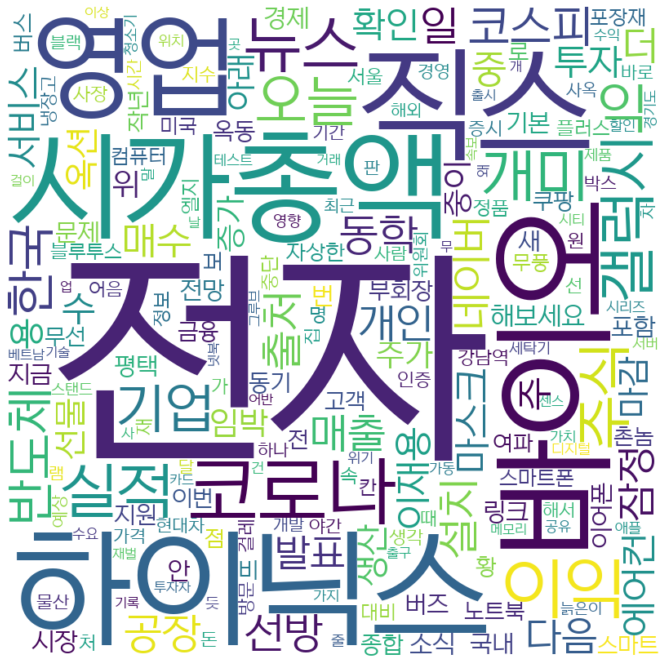

In [334]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_filename = 'C:/Users/nayay/AppData/Local/Microsoft/Windows\Fonts/NEXONLv1GothicRegular.ttf'

wordcloud = WordCloud(width = 800, height = 800, font_path = font_filename,
                     background_color = 'white',
                     stopwords = [],
                     min_font_size = 10).generate_from_frequencies(keywords)

fig = plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
fig.savefig('wordcloud_samsungelectronics.png')

In [2]:
import twitter
import json

with open('statuses_se.json', 'r', encoding = 'utf-8') as f: \
    statuses = json.load(f)
    
statuses[:5]

[{'created_at': 'Sat Apr 11 07:33:07 +0000 2020',
  'id': 1248876717269114883,
  'id_str': '1248876717269114883',
  'text': '요즘 주가를 보면 삼성전자 액면분할이 떠오른다.\n\n니들은 다 계획이 있구나.',
  'truncated': False,
  'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
  'metadata': {'result_type': 'recent', 'iso_language_code': 'ko'},
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 2974998120,
   'id_str': '2974998120',
   'name': '뻥쟁이',
   'screen_name': 'liberalthink2nd',
   'location': '',
   'description': "'차(tea) 와 차(car)' 얘기하려고 계정 팠는데, 어쩌다 학습관련 트윗이 흥하고 있네요.\n\n//  사교육과 무관한 일을 합니다.\n\n//  학생부종합•수시입학 반대\n\n// 차별 반대\n\n// 모병제 찬성",
   'url': None,
   'entities': {'description': {'urls': []}},
   'protected': False,
   'followers_count': 676,


In [3]:
status_text = [status['text'] for status in statuses 
              if 'retweeted_status' not in status]
dic = dict()

for status in statuses:
    if 'retweeted_status' in status:
        retweeted_ids = status['retweeted_status']['id']
        retweeted_texts = status['text']
        
        dic[retweeted_ids] = retweeted_texts
        nodup_rts = list(dic.values())
        
status_text += nodup_rts
len(status_text)

1201

In [4]:
status_text[:10]

['요즘 주가를 보면 삼성전자 액면분할이 떠오른다.\n\n니들은 다 계획이 있구나.',
 '어반 그루브는 강남역 8번 출구, 삼성 전자 사옥 바로 뒷편 2층에 위치해있습니다!',
 '삼성전자 떡상하기 전까지 돈 없을 예정임 (거렁뱅이)',
 '@bestwest1967 4년전의 아쉬움이 드디어 풀리겠네요 양향자 문재인 영입인사 삼성전자 상무 광주를 떠나지않고 묵묵히 지킨 여성의원 호남의 자랑이 되어주시길 바랍니다',
 '넷북 삼성전자 센스 NT-X170 -버스안에서 테스트 https://t.co/Qtb1Jpm2cc',
 '[ #Tistory ] 삼성전자 1분기 실적 후, 삼성증권 리포트 요약 https://t.co/FnvRhvtXx6',
 '@the_doubtist 전 우량주 요 ㅋㅋ 삼성전자 ㅋㅋ',
 '3분 후면 삼성전자 칸 코치의 시간이로군. 삼성전자 칸 하니 병구오빠와 영무오빠의 예언자가 되고 싶다.',
 '@2020_oldkiddy 저는 차트랑 이거저거 볼줄 모르는데요 단기에 훅 오르는 것은 불가하다고 생각해서요 앞으로 삼성전자 생각하면 저는 적금처럼 계속 모아두는 것은 언제든지 사도 좋다고 봅니다 제가 제왑… https://t.co/FejRMQgcDw',
 '@PeterLeejoa 분석 잘 참조 하겠습니다. 제 개인적 의견인데 삼성전자와 하이닉스의 월봉에서의 RSI하락다이버전스가 매우 강하게 나왔습니다. 과거 차트 봐도 월봉에서 하락다이버전스가 나온경우 주가가… https://t.co/XBq0Ev1tRZ']